## Test statistics on a toy likelihood

Using a Gaussian likelihood, test minimizer and scan objects

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 140
mpl.rcParams['figure.dpi'] = 140
import numpy as np
# our modules
import toy_likelihood
import likelihood_parameter
import iminuit_minimizer
import grid_scanner

Setup toy likelihood

In [2]:
# Likelihood parameters
free_params=[]
free_params.append(likelihood_parameter.LikelihoodParameter(name='A',
                        value=1000.0,min_value=900.0,max_value=1100.0))
free_params.append(likelihood_parameter.LikelihoodParameter(name='B',
                        value=0.5,min_value=0.0,max_value=1.0))
free_params.append(likelihood_parameter.LikelihoodParameter(name='C',
                        value=0.0,min_value=-0.01,max_value=0.01))

In [3]:
prior_rms=0.1
like=toy_likelihood.ToyLikelihood(free_params,prior_rms)

input free_parameter
A = 1000.0
B = 0.5
C = 0.0


In [4]:
# choose random starting point, and test likelihood
start=np.random.rand(len(free_params))
print('starting point =',start)
print('log_prob =',like.log_prob(values=start))

starting point = [0.3097071  0.85023888 0.84811773]
log_prob = -14.00323077899238


### Setup and run iminuit minimizer

In [5]:
minimizer = iminuit_minimizer.IminuitMinimizer(like,start=start)

In [6]:
minimizer.minimize()

will run migrad
------------------------------------------------------------------
| FCN = 2.74e-19                |      Ncalls=30 (30 total)      |
| EDM = 2.74e-19 (Goal: 0.0001) |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
will compute Hessian matrix


In [7]:
print('best-fit (cube) values =',minimizer.minimizer.np_values())
print('uncertainties =',minimizer.minimizer.np_errors())

best-fit (cube) values = [0.5 0.5 0.5]
uncertainties = [0.1 0.1 0.1]


In [8]:
# get proper errors from likelihood scans (same since Gaussian is likelihood)
minimizer.minimizer.minos()

------------------------------------------------------------------------------------
|          |           A           |           B           |           C           |
------------------------------------------------------------------------------------
|  Error   |   -0.1    |    0.1    |   -0.1    |    0.1    |   -0.1    |    0.1    |
|  Valid   |   True    |   True    |   True    |   True    |   True    |   True    |
| At Limit |   False   |   False   |   False   |   False   |   False   |   False   |
| Max FCN  |   False   |   False   |   False   |   False   |   False   |   False   |
| New Min  |   False   |   False   |   False   |   False   |   False   |   False   |
------------------------------------------------------------------------------------

In [9]:
# get parameters covariance
minimizer.minimizer.np_covariance()

array([[ 1.00000000e-02, -7.52316413e-35,  8.67361753e-19],
       [-7.52316413e-35,  1.00000000e-02, -8.67361757e-19],
       [ 8.67361753e-19, -8.67361757e-19,  1.00000000e-02]])

### Use iminuit functions to make plots (parameter values in unit cube)

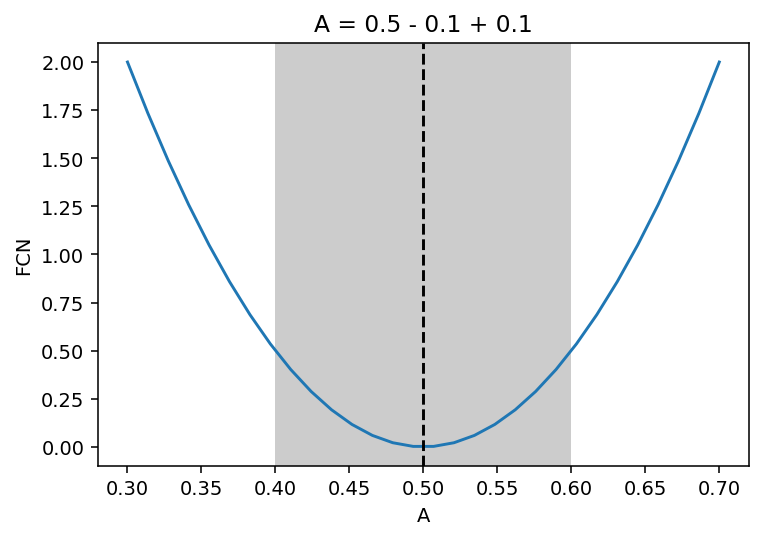

In [10]:
# scan one parameter at a time, fixing other parameters to best fit 
_=minimizer.minimizer.draw_profile(vname='A',bins=30)

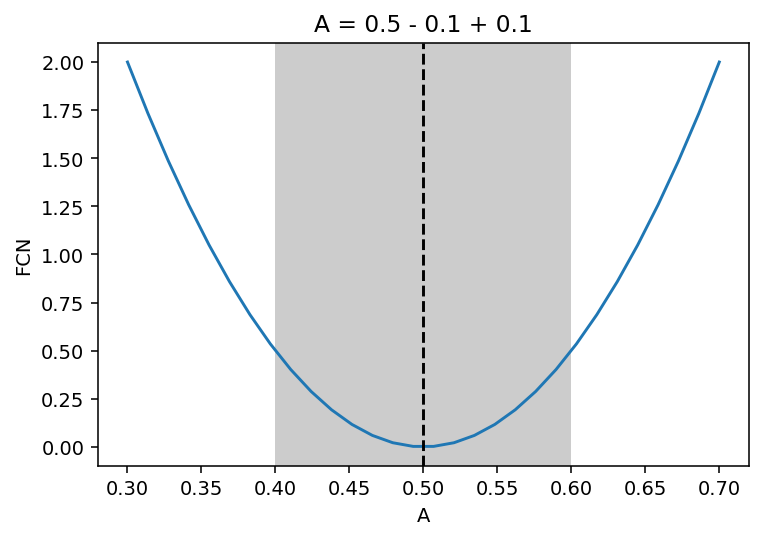

In [11]:
# scan one parameter at a time, fixing other parameters (identical to above, since likelihood is Gaussian)
minimizer.minimizer.draw_mnprofile(vname='A',bins=30);

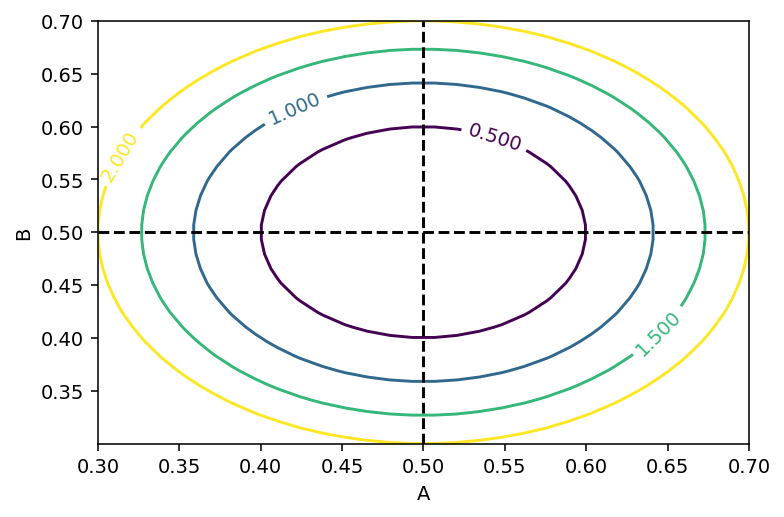

In [12]:
# 2D contours, fixing other parameters to best-fit (note that contours are 1D sigmas, not 2D)
_=minimizer.minimizer.draw_contour('A','B',bins=30);

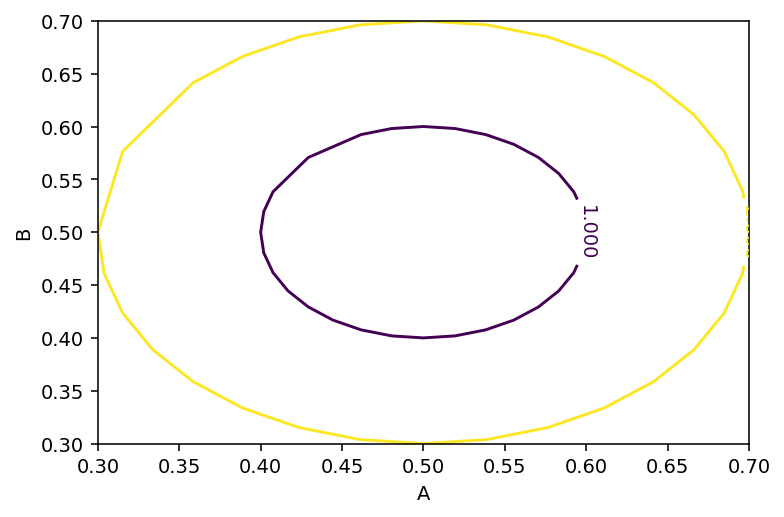

In [13]:
# 2D contours, minimizing other parameters (note that contours are 1D sigmas, not 2D)
minimizer.minimizer.draw_mncontour('A','B',numpoints=30);

### Make plots with our own modules - Gaussian ellipses

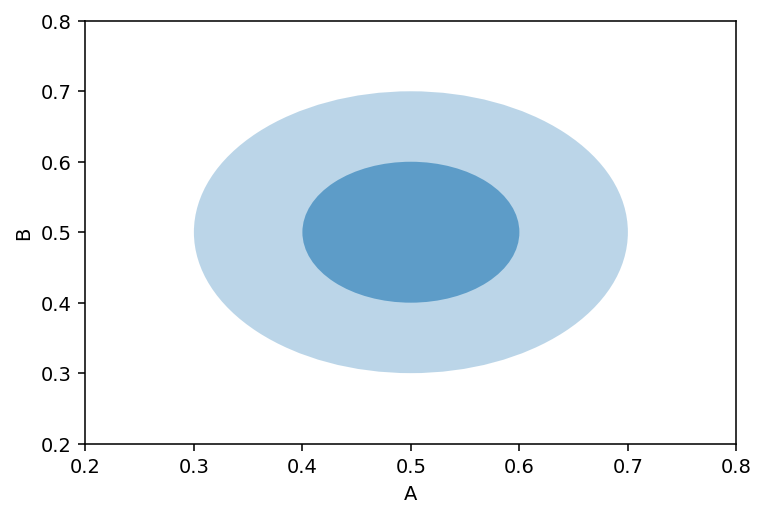

In [14]:
# Gaussian ellipses, using unit cube values - note that contours are 1D sigmas (Delta chi2 = 1,4), not 2D
minimizer.plot_ellipses('A','B',cube_values=True) 

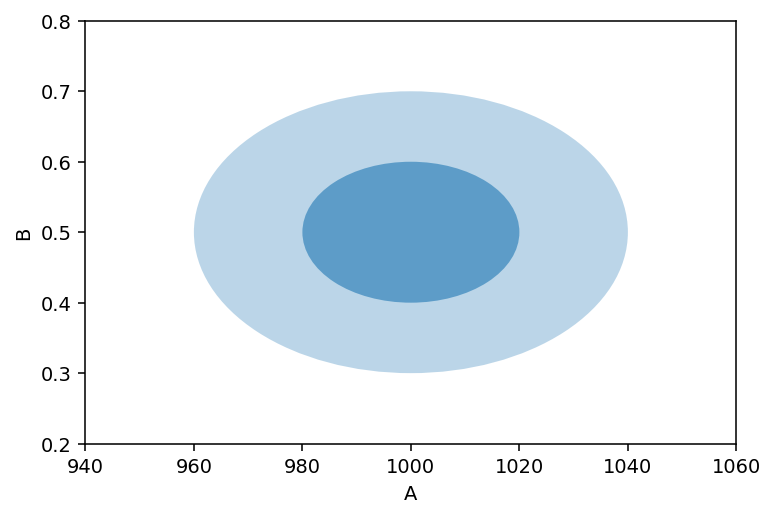

In [15]:
# Gaussian ellipse, using absolute parameter values
minimizer.plot_ellipses('A','B',cube_values=False) 

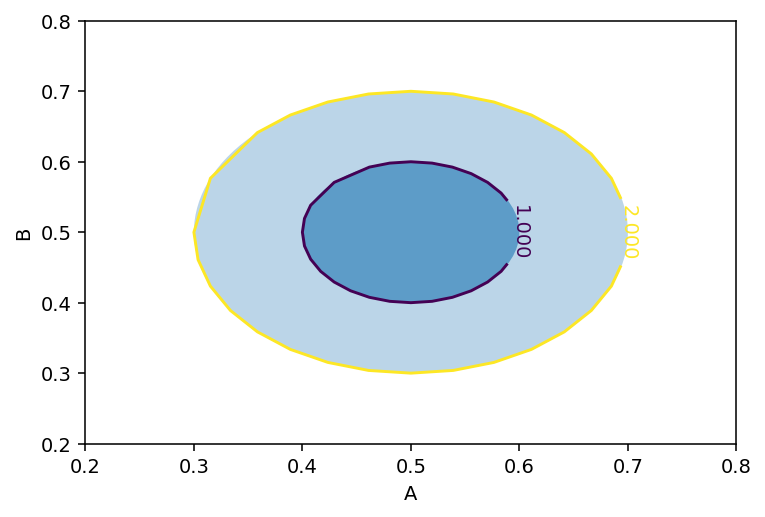

In [16]:
# compare with function from iminuit - contours are still 1D sigmas, not 68/95% probabilities
minimizer.plot_ellipses('A','B',cube_values=True)
# this will take a while, it computes several minimizations
minimizer.minimizer.draw_mncontour('A','B',numpoints=30)

## Try our own 1D scans

In [17]:
A=free_params[0]
scan1D=grid_scanner.Scan1D(like,param_grid={'name':A.name,'minval':A.min_value,
                                           'maxval':A.max_value,'nval':30})

will compute grid scan
will run migrad
------------------------------------------------------------------
| FCN = 0                       |      Ncalls=29 (29 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
global chi2 = 0.0 ; best-fit = [0.5 0.5 0.5]
0 A 900.0 in cube 0.0
will run migrad
------------------------------------------------------------------
| FCN =

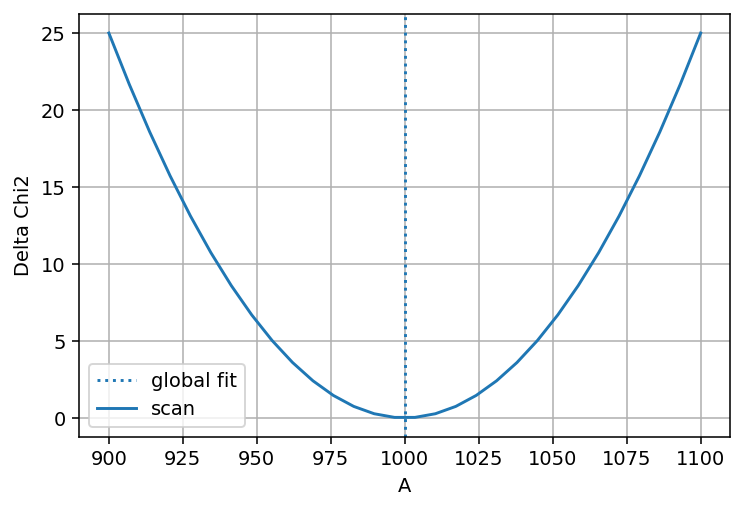

In [18]:
scan1D.plot_grid_scan(cube_values=False,yaxis='DeltaChi2')

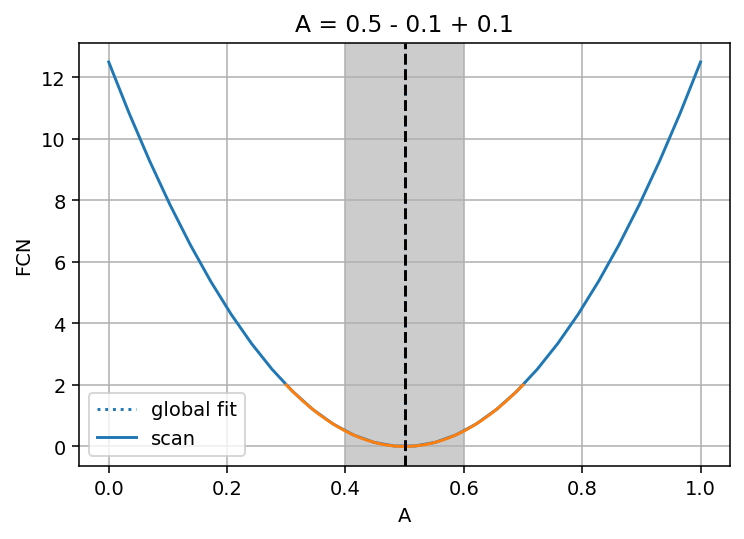

In [19]:
# compare with function from iminuit (cube values)
scan1D.plot_grid_scan(cube_values=True,yaxis='DeltaMinusLogLike')
minimizer.minimizer.draw_mnprofile(vname='A',bins=30);

## Try our own 2D scans

In [20]:
p1=free_params[0]
p2=free_params[1]
param_grid_1={'name':p1.name,'minval':p1.min_value,'maxval':p1.max_value,'nval':50}
param_grid_2={'name':p2.name,'minval':p2.min_value,'maxval':p2.max_value,'nval':50}
scan2D=grid_scanner.Scan2D(like,param_grid_1=param_grid_1,param_grid_2=param_grid_2)

In [21]:
# compute actual scan (might take a few seconds)
scan2D.get_grid_scan();

will compute grid scan
will run migrad
------------------------------------------------------------------
| FCN = 0                       |      Ncalls=29 (29 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
global chi2 = 0.0 ; best-fit = [0.5 0.5 0.5]
0 A 900.0 in cube 0.0
1 B 0.0 in cube 0.0
will run migrad
------------------------------------------------------

------------------------------------------------------------------
| FCN = 12.05                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1038.7755102040817 in cube 0.6938775510204084
1 B 0.04081632653061224 in cube 0.04081632653061224
will run migrad
------------------------------------------------------------------
| FCN = 12.

will run migrad
------------------------------------------------------------------
| FCN = 13.59                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 936.7346938775511 in cube 0.18367346938775542
1 B 0.1020408163265306 in cube 0.1020408163265306
will run migrad
----------------------------------------------------------------

will run migrad
------------------------------------------------------------------
| FCN = 7.882                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1038.7755102040817 in cube 0.6938775510204084
1 B 0.14285714285714285 in cube 0.14285714285714285
will run migrad
--------------------------------------------------------------

1 B 0.2040816326530612 in cube 0.2040816326530612
will run migrad
------------------------------------------------------------------
| FCN = 10.05                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 936.7346938775511 in cube 0.18367346938775542
1 B 0.2040816326530612 in cube 0.2040816326530612
will run migrad
--------------

1 B 0.24489795918367346 in cube 0.24489795918367346
will run migrad
------------------------------------------------------------------
| FCN = 4.758                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1038.7755102040817 in cube 0.6938775510204084
1 B 0.24489795918367346 in cube 0.24489795918367346
will run migrad
----------

1 B 0.3061224489795918 in cube 0.3061224489795918
will run migrad
------------------------------------------------------------------
| FCN = 7.549                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 936.7346938775511 in cube 0.18367346938775542
1 B 0.3061224489795918 in cube 0.3061224489795918
will run migrad
--------------

1 B 0.3469387755102041 in cube 0.3469387755102041
will run migrad
------------------------------------------------------------------
| FCN = 2.676                   |      Ncalls=10 (10 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1038.7755102040817 in cube 0.6938775510204084
1 B 0.3469387755102041 in cube 0.3469387755102041
will run migrad
--------------

1 B 0.4081632653061224 in cube 0.4081632653061224
will run migrad
------------------------------------------------------------------
| FCN = 6.091                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 936.7346938775511 in cube 0.18367346938775542
1 B 0.4081632653061224 in cube 0.4081632653061224
will run migrad
--------------

1 B 0.44897959183673464 in cube 0.44897959183673464
will run migrad
------------------------------------------------------------------
| FCN = 1.635                   |      Ncalls=10 (10 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1038.7755102040817 in cube 0.6938775510204084
1 B 0.44897959183673464 in cube 0.44897959183673464
will run migrad
----------

1 B 0.5102040816326531 in cube 0.5102040816326531
will run migrad
------------------------------------------------------------------
| FCN = 5.675                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 936.7346938775511 in cube 0.18367346938775542
1 B 0.5102040816326531 in cube 0.5102040816326531
will run migrad
--------------

1 B 0.5510204081632653 in cube 0.5510204081632653
will run migrad
------------------------------------------------------------------
| FCN = 1.635                   |      Ncalls=10 (10 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1038.7755102040817 in cube 0.6938775510204084
1 B 0.5510204081632653 in cube 0.5510204081632653
will run migrad
--------------

1 B 0.6122448979591836 in cube 0.6122448979591836
will run migrad
------------------------------------------------------------------
| FCN = 6.299                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 936.7346938775511 in cube 0.18367346938775542
1 B 0.6122448979591836 in cube 0.6122448979591836
will run migrad
--------------

1 B 0.6530612244897959 in cube 0.6530612244897959
will run migrad
------------------------------------------------------------------
| FCN = 2.676                   |      Ncalls=10 (10 total)      |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1038.7755102040817 in cube 0.6938775510204084
1 B 0.6530612244897959 in cube 0.6530612244897959
will run migrad
--------------

0 A 932.6530612244898 in cube 0.1632653061224488
1 B 0.7142857142857142 in cube 0.7142857142857142
will run migrad
------------------------------------------------------------------
| FCN = 7.965                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 936.7346938775511 in cube 0.18367346938775542
1 B 0.7142857142857142 in cube 

0 A 1034.6938775510205 in cube 0.6734693877551023
1 B 0.7551020408163265 in cube 0.7551020408163265
will run migrad
------------------------------------------------------------------
| FCN = 4.758                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1038.7755102040817 in cube 0.6938775510204084
1 B 0.7551020408163265 in cube

0 A 932.6530612244898 in cube 0.1632653061224488
1 B 0.8163265306122448 in cube 0.8163265306122448
will run migrad
------------------------------------------------------------------
| FCN = 10.67                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 936.7346938775511 in cube 0.18367346938775542
1 B 0.8163265306122448 in cube 

0 A 1034.6938775510205 in cube 0.6734693877551023
1 B 0.8571428571428571 in cube 0.8571428571428571
will run migrad
------------------------------------------------------------------
| FCN = 7.882                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1038.7755102040817 in cube 0.6938775510204084
1 B 0.8571428571428571 in cube

0 A 932.6530612244898 in cube 0.1632653061224488
1 B 0.9183673469387754 in cube 0.9183673469387754
will run migrad
------------------------------------------------------------------
| FCN = 14.42                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 936.7346938775511 in cube 0.18367346938775542
1 B 0.9183673469387754 in cube 

0 A 1034.6938775510205 in cube 0.6734693877551023
1 B 0.9591836734693877 in cube 0.9591836734693877
will run migrad
------------------------------------------------------------------
| FCN = 12.05                   |       Ncalls=8 (8 total)       |
| EDM = 0 (Goal: 0.0001)        |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0 A 1038.7755102040817 in cube 0.6938775510204084
1 B 0.9591836734693877 in cube

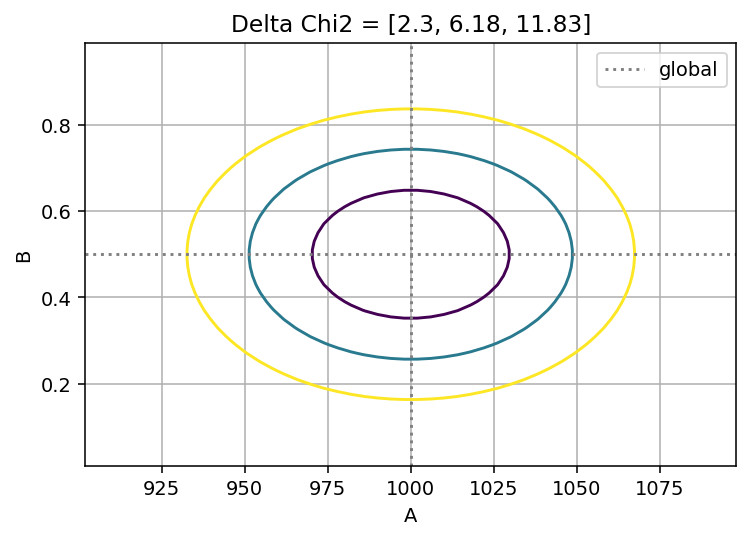

In [22]:
# plot Delta Chi2 for the usual 68/95/99% CL
scan2D.plot_grid_scan(cube_values=False,zaxis='DeltaChi2');

/Users/font/Library/Python/3.7/lib/python/site-packages/iminuit_minimizer.py:146: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig = plt.subplot(111)


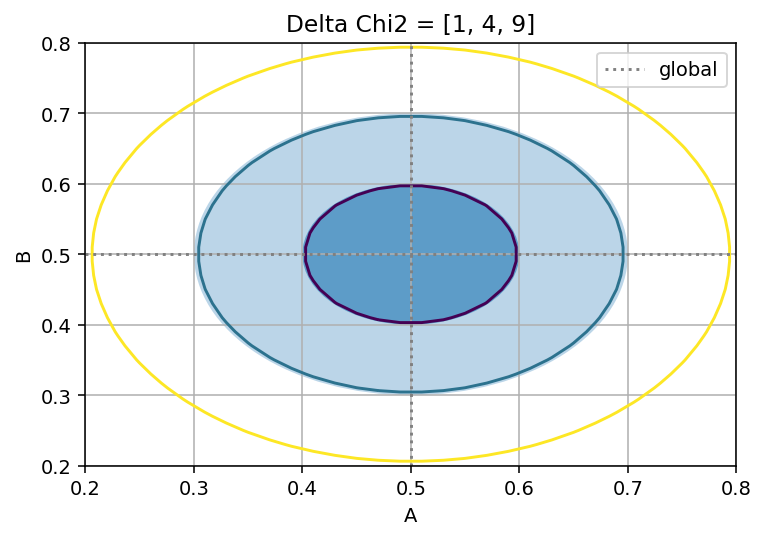

In [23]:
# compare to ellipses, using cube values, and for 1D sigmas
scan2D.plot_grid_scan(cube_values=True,zaxis='DeltaChi2',levels=[1,4,9])
minimizer.plot_ellipses(p1.name,p2.name,cube_values=True)

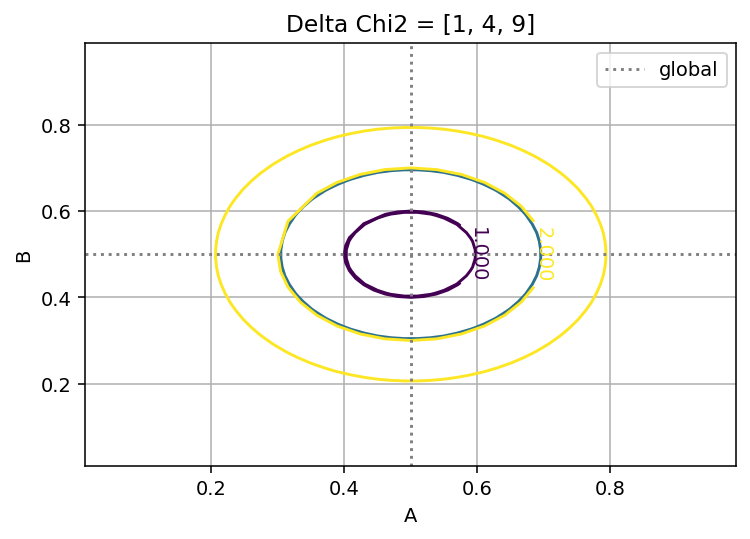

In [24]:
# compare to iminuit, using cube values, and for 1D sigmas
scan2D.plot_grid_scan(cube_values=True,zaxis='DeltaChi2',levels=[1,4,9])
#minimizer.plot_ellipses(p1.name,p2.name,cube_values=True)
minimizer.minimizer.draw_mncontour(p1.name,p2.name,numpoints=30)